# A4: Common Analysis
___


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

## Step 0: Data Acquisition
___


In [14]:
confirmed_cases = pd.read_csv("RAW_us_confirmed_cases.csv")
mask_use = pd.read_csv("mask-use-by-county.csv")
mandates = pd.read_csv("U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")

In [18]:
date_columns = list(confirmed_cases.columns)#[11:]
confirmed_case_data = pd.melt(confirmed_cases, value_vars=date_columns[11:], id_vars=date_columns[:11])
confirmed_case_data.rename(columns={'variable':'Date', 'value':'Cases'}, inplace=True)
confirmed_case_data

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172295,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,"Teton, Wyoming, US",11/1/21,5218
2172296,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,"Uinta, Wyoming, US",11/1/21,3843
2172297,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,"Unassigned, Wyoming, US",11/1/21,0
2172298,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,"Washakie, Wyoming, US",11/1/21,1745


## Step 1: Analyze
___

In [23]:
oklahoma_cases = confirmed_case_data[(confirmed_case_data['Admin2'] == 'Oklahoma')]
oklahoma_cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Cases
2268,Oklahoma,Oklahoma,84040109,US,USA,840,40109.0,US,35.551401,-97.407169,"Oklahoma, Oklahoma, US",1/22/20,0
5610,Oklahoma,Oklahoma,84040109,US,USA,840,40109.0,US,35.551401,-97.407169,"Oklahoma, Oklahoma, US",1/23/20,0
8952,Oklahoma,Oklahoma,84040109,US,USA,840,40109.0,US,35.551401,-97.407169,"Oklahoma, Oklahoma, US",1/24/20,0
12294,Oklahoma,Oklahoma,84040109,US,USA,840,40109.0,US,35.551401,-97.407169,"Oklahoma, Oklahoma, US",1/25/20,0
15636,Oklahoma,Oklahoma,84040109,US,USA,840,40109.0,US,35.551401,-97.407169,"Oklahoma, Oklahoma, US",1/26/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157858,Oklahoma,Oklahoma,84040109,US,USA,840,40109.0,US,35.551401,-97.407169,"Oklahoma, Oklahoma, US",10/28/21,119447
2161200,Oklahoma,Oklahoma,84040109,US,USA,840,40109.0,US,35.551401,-97.407169,"Oklahoma, Oklahoma, US",10/29/21,119447
2164542,Oklahoma,Oklahoma,84040109,US,USA,840,40109.0,US,35.551401,-97.407169,"Oklahoma, Oklahoma, US",10/30/21,119447
2167884,Oklahoma,Oklahoma,84040109,US,USA,840,40109.0,US,35.551401,-97.407169,"Oklahoma, Oklahoma, US",10/31/21,119447


In [25]:
oklahoma_cases['State'] = 'Oklahoma'
oklahoma_cases['County'] = 'Oklahoma County'
oklahoma_cases['FIPS'] = 109 #oklahoma_cases['FIPS'].values[0]
oklahoma_cases['Latitude'] = oklahoma_cases['Lat'].values[0]
oklahoma_cases['Longitude'] = oklahoma_cases['Long_'].values[0]
oklahoma_case_data = oklahoma_cases[['State', 'County', 'FIPS', 'Latitude', 'Longitude','Date', 'Cases']]
oklahoma_case_data['Date'] = pd.to_datetime(oklahoma_case_data['Date'])
daily_cases = np.diff(oklahoma_case_data['Cases'])
daily_cases = np.insert(daily_cases, 0, [0])
oklahoma_case_data['Daily_cases'] = daily_cases
oklahoma_case_data


/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,State,County,FIPS,Latitude,Longitude,Date,Cases,Daily_cases
2268,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-22,0,0
5610,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-23,0,0
8952,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-24,0,0
12294,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-25,0,0
15636,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-26,0,0
...,...,...,...,...,...,...,...,...
2157858,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2021-10-28,119447,0
2161200,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2021-10-29,119447,0
2164542,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2021-10-30,119447,0
2167884,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2021-10-31,119447,0


In [5]:
oklahoma_mandates = mandates[(mandates['State_Tribe_Territory'] == 'OK') & (mandates['County_Name'] == 'Oklahoma County')]
oklahoma_mandates = oklahoma_mandates.rename(columns={'County_Name':'County', 'FIPS_County':'FIPS', 'date':'Date'})
oklahoma_mandates['Date'] = pd.to_datetime(oklahoma_mandates['Date'])
oklahoma_mandates


,State_Tribe_Territory,County,FIPS_State,FIPS,Date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
581210,OK,Oklahoma County,40,109,2020-04-10,2,NaN,NaN,NaN,NaN
581211,OK,Oklahoma County,40,109,2020-04-11,2,NaN,NaN,NaN,NaN
581212,OK,Oklahoma County,40,109,2020-04-12,2,NaN,NaN,NaN,NaN
581213,OK,Oklahoma County,40,109,2020-04-13,2,NaN,NaN,NaN,NaN
581214,OK,Oklahoma County,40,109,2020-04-14,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1356195,OK,Oklahoma County,40,109,2021-08-11,2,NaN,NaN,NaN,NaN
1356196,OK,Oklahoma County,40,109,2021-08-12,2,NaN,NaN,NaN,NaN
1356197,OK,Oklahoma County,40,109,2021-08-13,2,NaN,NaN,NaN,NaN
1356198,OK,Oklahoma County,40,109,2021-08-14,2,NaN,NaN,NaN,NaN


In [6]:
ok_fips_state = oklahoma_mandates['FIPS_State'].unique()[0]
ok_fips_county = oklahoma_mandates['FIPS'].unique()[0]
ok_fips_state_county = int(str(ok_fips_state) + str(ok_fips_county))

In [7]:
oklahoma_mask_use = mask_use[mask_use['COUNTYFP'] == ok_fips_state_county]
oklahoma_mask_use['FIPS'] = ok_fips_county
oklahoma_mask_use

/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,FIPS
2185,40109,0.096,0.064,0.097,0.225,0.518,109


In [9]:
oklahoma_merged = pd.merge(oklahoma_cases, oklahoma_mandates, how='outer', on=['County', 'FIPS', 'Date'])
oklahoma_merged = pd.merge(oklahoma_merged, oklahoma_mask_use, how='outer', on=['FIPS'])
oklahoma_merged

,State,County,FIPS,Latitude,Longitude,Date,Cases,Daily_cases,State_Tribe_Territory,FIPS_State,...,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-22,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518
1,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-23,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518
2,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-24,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518
3,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-25,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518
4,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-26,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2021-10-28,119447,0,NaN,NaN,...,NaN,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518
646,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2021-10-29,119447,0,NaN,NaN,...,NaN,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518
647,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2021-10-30,119447,0,NaN,NaN,...,NaN,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518
648,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2021-10-31,119447,0,NaN,NaN,...,NaN,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518


In [10]:
oklahoma_merged.to_csv('oklahoma_merged.csv')

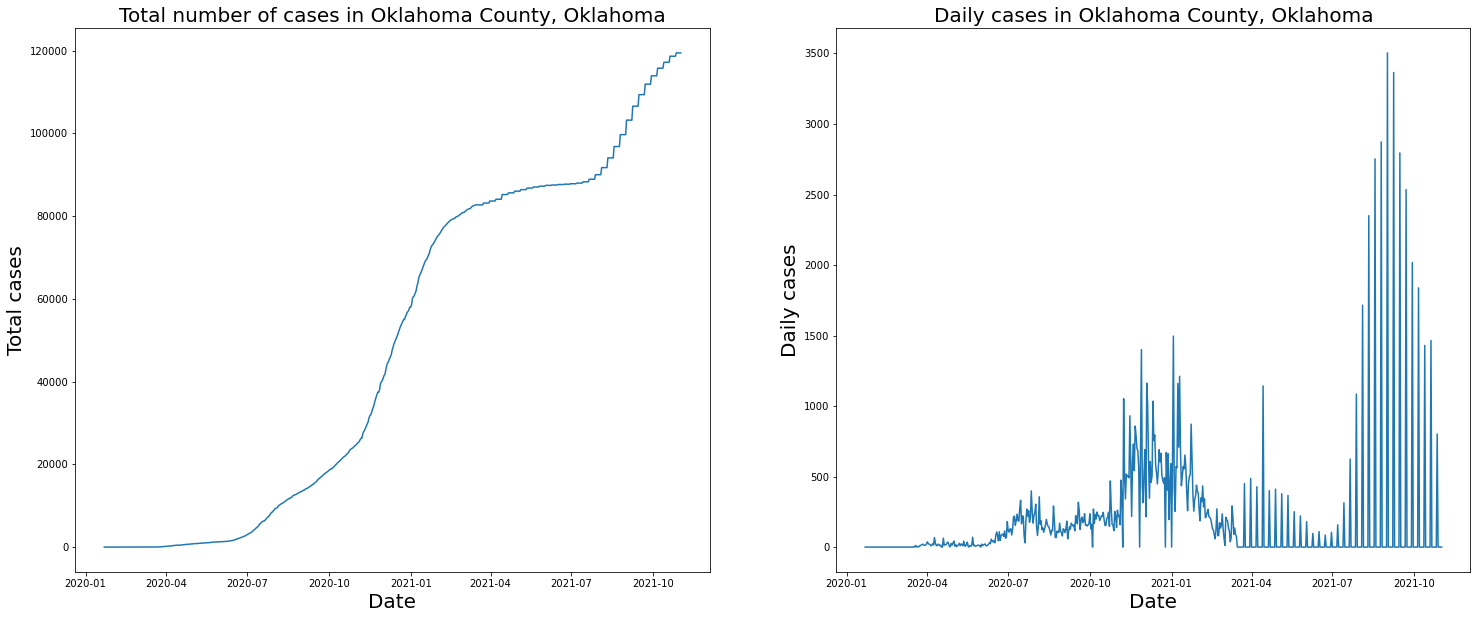

In [133]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.plot(oklahoma_cases['Date'], oklahoma_cases['Cases']);
plt.title("Total number of cases in Oklahoma County, Oklahoma", fontsize=20);
plt.xlabel('Date', fontsize=20);
plt.ylabel("Total cases", fontsize=20);

fig.add_subplot(1, 2, 2)
plt.plot(oklahoma_cases['Date'], oklahoma_cases['Daily_cases']);
plt.title("Daily cases in Oklahoma County, Oklahoma", fontsize=20);
plt.xlabel('Date', fontsize=20)
plt.ylabel("Daily cases", fontsize=20);

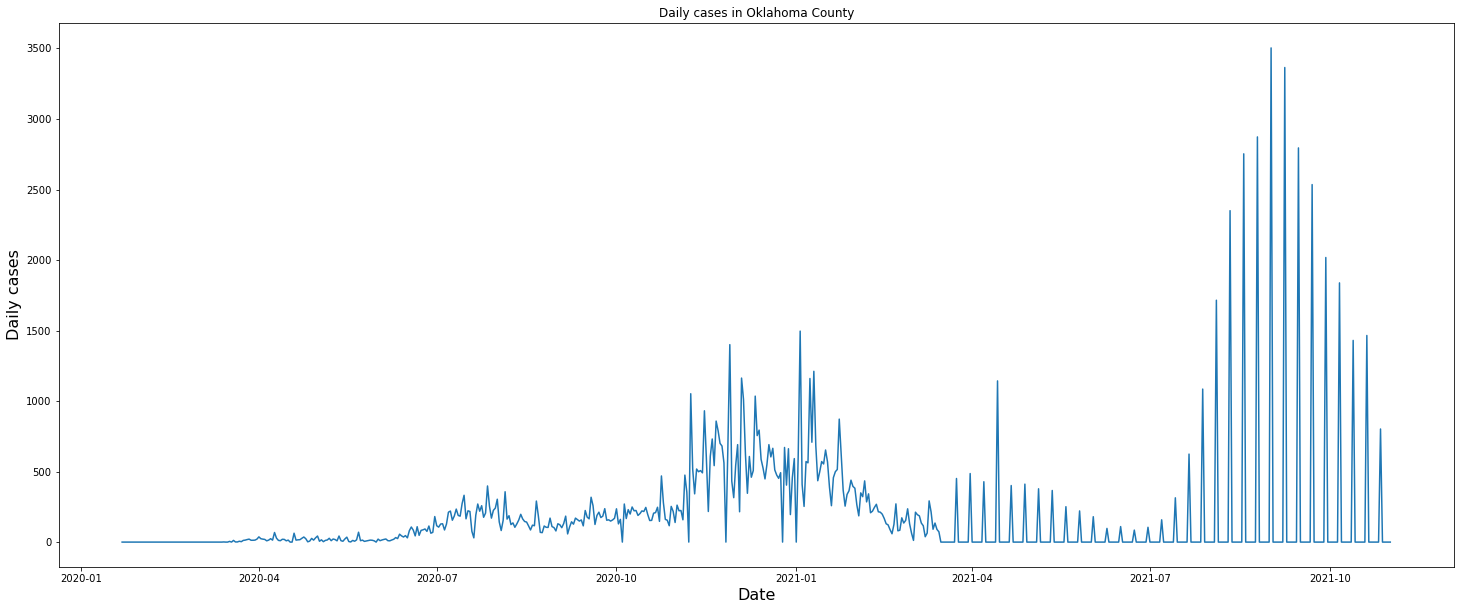

In [140]:
fig = plt.figure()
plt.plot(oklahoma_cases['Date'], oklahoma_cases['Daily_cases']);
plt.title("Daily cases in Oklahoma County");
plt.xlabel('Date')
plt.ylabel("Daily cases");

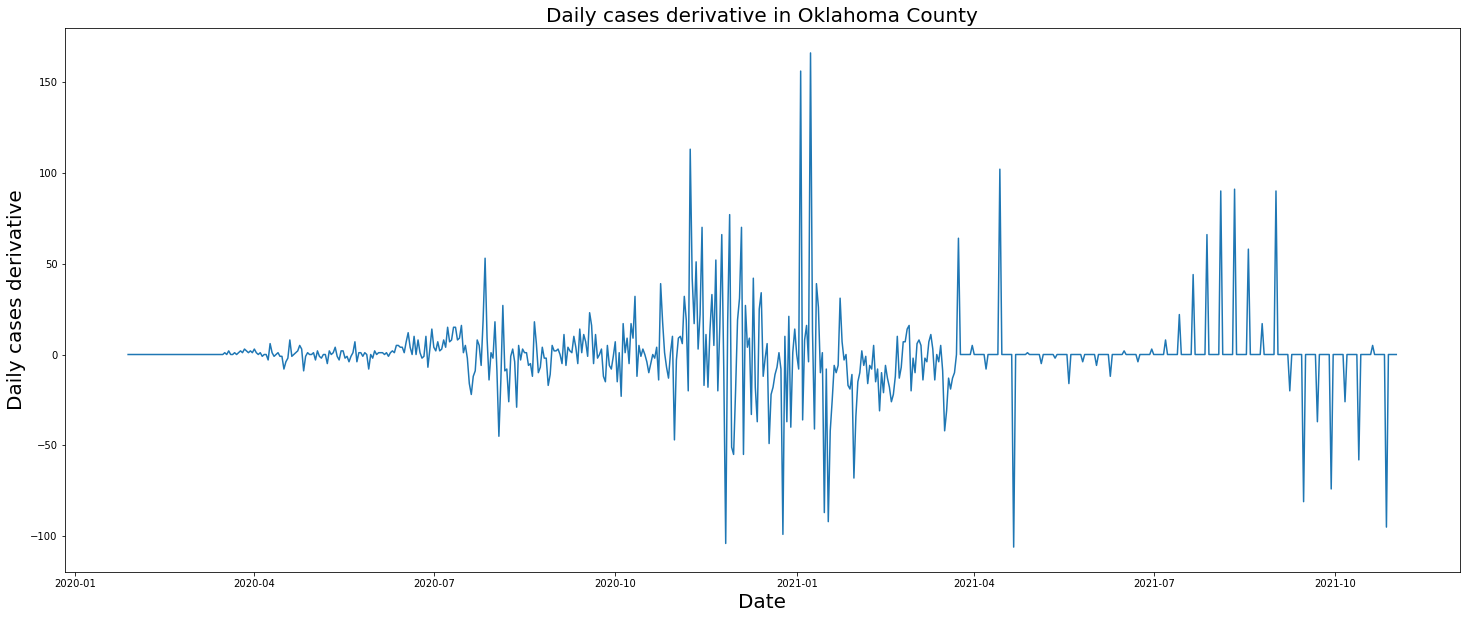

In [182]:
daily_cases_2 = np.diff(oklahoma_cases['Daily_cases'])
daily_cases_2 = np.insert(daily_cases_2, 0, [0])
ok_cases = oklahoma_cases.copy()
ok_cases['diff'] = daily_cases_2

fig = plt.figure()
plt.plot(oklahoma_cases['Date'], ok_cases['diff'].rolling(window=7).mean().round());
plt.title("Daily cases derivative in Oklahoma County", fontsize=20);
plt.xlabel('Date', fontsize=20)
plt.ylabel("Daily cases derivative", fontsize=20);

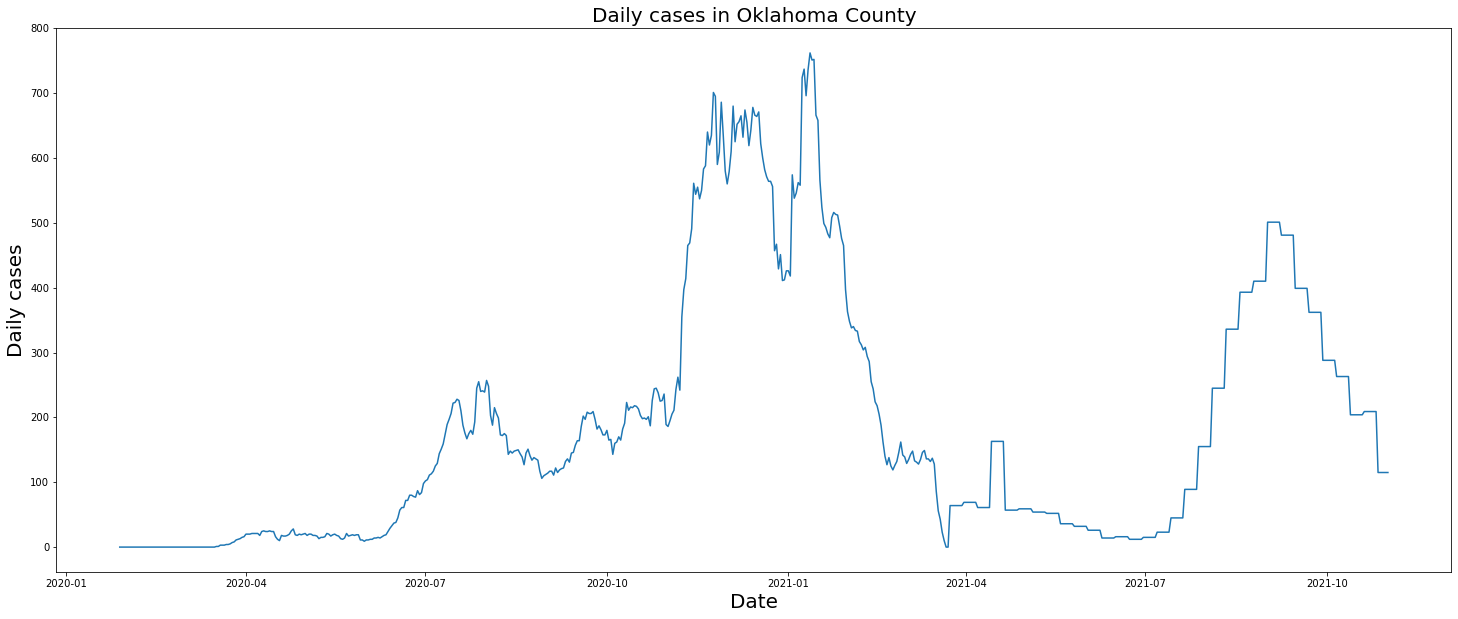

In [181]:
# df.column.rolling(window=7).mean().round()
fig = plt.figure()
plt.plot(oklahoma_cases['Date'], oklahoma_cases['Daily_cases'].rolling(window=7).mean().round());
plt.title("Daily cases in Oklahoma County", fontsize=20);
plt.xlabel('Date', fontsize=20)
plt.ylabel("Daily cases", fontsize=20);

0.096

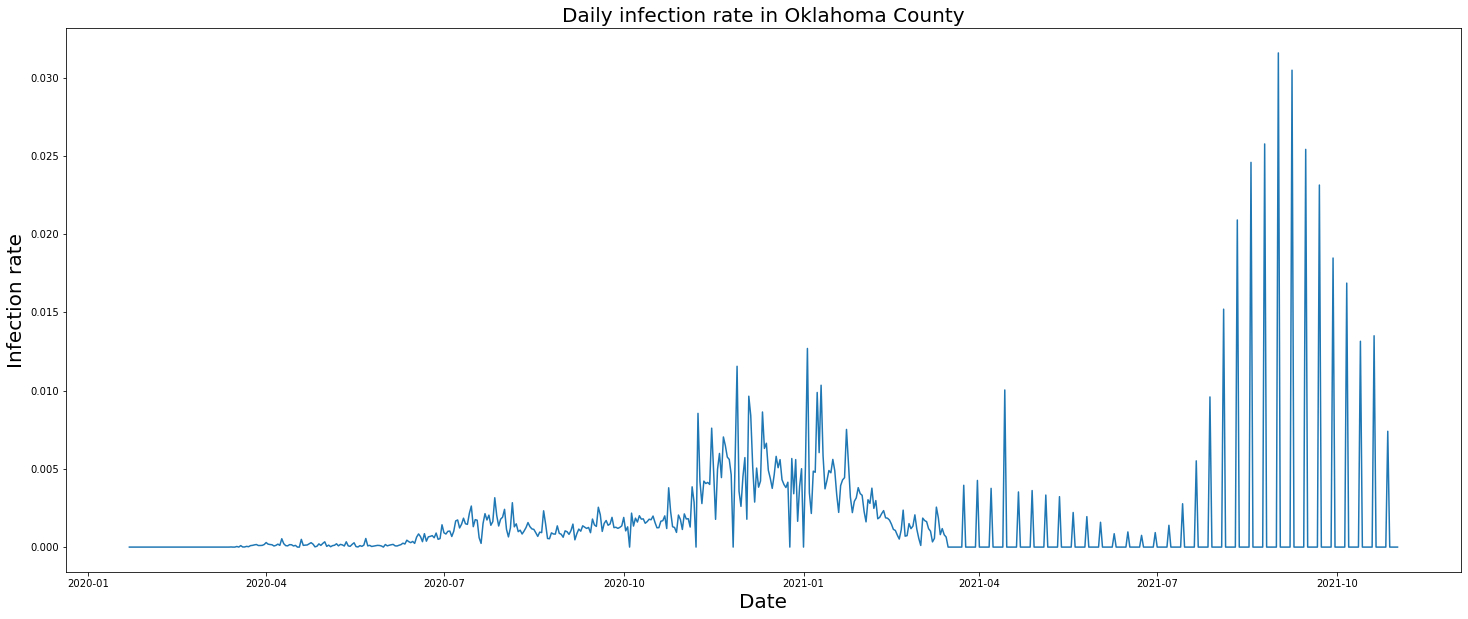

In [180]:
oklahoma_pop = 796292
never_prop = oklahoma_mask_use['NEVER'].values[0]
rarely_prop = oklahoma_mask_use['RARELY'].values[0]
at_risk_prop = never_prop + rarely_prop

oklahoma_cases['Infection Rate'] = oklahoma_cases['Daily_cases']/((oklahoma_pop-oklahoma_cases['Cases'])*at_risk_prop)

fig = plt.figure()
# fig.add_subplot(2, 1, 1)
# plt.plot(oklahoma_cases['Date'],  oklahoma_cases['Daily_cases']/((oklahoma_pop-oklahoma_cases['Cases'])));
# plt.title("Daily infection rate in Oklahoma County");
# plt.xlabel('Date')
# plt.ylabel("Infection rate");

# fig.add_subplot(2, 1, 2)
plt.plot(oklahoma_cases['Date'],  oklahoma_cases['Infection Rate']);
plt.title("Daily infection rate in Oklahoma County", fontsize=20);
plt.xlabel('Date', fontsize=20)
plt.ylabel("Infection rate", fontsize=20);


In [143]:
start_date = '2020-07-02'
end_date = '2020-07-14'
mask = (oklahoma_cases.Date >= start_date) & (oklahoma_cases.Date < end_date)
oklahoma_cases.loc[mask]

,State,County,FIPS,Latitude,Longitude,Date,Cases,Daily_cases
162,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-02,3135,106
163,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-03,3263,128
164,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-04,3393,130
165,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-05,3479,86
166,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-06,3607,128
167,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-07,3819,212
168,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-08,4039,220
169,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-09,4194,155
170,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-10,4379,185
171,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-07-11,4613,234
